<a href="https://colab.research.google.com/github/rileythejones/DS-Unit-2-Linear-Models/blob/master/RJ_assignment_regression_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

# import pandas_profiling
# df.profile_report()

# feature engineer pet_friendly 
df['pet_friendly'] = df['dogs_allowed'] + df['cats_allowed']


# add datetime
import datetime
df['created'] = pd.to_datetime(df['created'])
df_train = df.loc[(df['created'].dt.month==4)|(df['created'].dt.month==5)]
df_test = df.loc[(df['created'].dt.month==6)]
df_train.shape, df_test.shape

# import plotly.express as px
# px.scatter(df, x='longitude', y='latitude', opacity=0.2)

In [0]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
df_train_lat_long = df_train[['latitude', 'longitude']]
df_train_lat_long['cluster'] = labels
# df_train_scaled = scaler.fit_transform(df_train_lat_long)

# from sklearn.decomposition import PCA
# pca = PCA(10)
# pca_features = pca.fit_transform(df_train_scaled)
# pca_features

In [2]:
# Baseline 
from sklearn.metrics import mean_absolute_error
target = 'price'
y_train = df_train[target]
y_test = df_test[target]

print('Mean Baseline (using 0 features)')
guess = y_train.mean()

y_pred = [guess] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error (April, May): {mae:.2f} $/month')

y_pred = [guess] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Error (June): {mae:.2f} $/month')

Mean Baseline (using 0 features)
Train Error (April, May): 1201.88 $/month
Test Error (June): 1197.71 $/month


In [3]:
# Regressing on 'Bedrooms'
from sklearn.linear_model import LinearRegression
model = LinearRegression()

features = ['bedrooms']
X_train = df_train[features]
X_test = df_test[features]
print(f'Linear Regression, dependent on: {features}')

model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error: {mae:.2f} $/month')

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Error: {mae:.2f} $/month')

Linear Regression, dependent on: ['bedrooms']
Train Error: 969.88 $/month
Test Error: 988.73 $/month


In [4]:
# Regressing on 'Bedrooms' and 'bathrooms'. 

features = ['bedrooms', 'bathrooms']
print(f'Linear Regression, dependent on: {features}')
X_train = df_train[features]
X_test = df_test[features]

model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error: {mae:.2f} $/month')

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Error: {mae:.2f} $/month')

Linear Regression, dependent on: ['bedrooms', 'bathrooms']
Train Error: 818.53 $/month
Test Error: 825.90 $/month


In [0]:


import matplotlib.pyplot as plt

fig, ax = plt.subplots()
colors = {0:'red', 1:'blue', 2:'yellow', 3:'orange', 4:'green', 5:'black', 6:'cyan', 7:'yellow', 8:'orange', 9:'green'}
grouped = df_train_lat_long.groupby('cluster')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='latitude', y='longitude', label=key, color=colors[key])
plt.title('Graphing the clusters from lat/long data')
plt.show()   

In [5]:
# adding pet_friendly did almost nothing to improve accuracy 

# Re-arrange X features matrices
features = ['bedrooms', 'bathrooms', 'pet_friendly']
print(f'Linear Regression, dependent on: {features}')
X_train = df_train[features]
X_test = df_test[features]

# Fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error: {mae:.2f} $/month')

# Apply the model to new data
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Error: {mae:.2f} $/month')

Linear Regression, dependent on: ['bedrooms', 'bathrooms', 'pet_friendly']
Train Error: 814.63 $/month
Test Error: 822.21 $/month


In [15]:
from sklearn.cluster import KMeans
df_train_lat_long = df_train[['latitude', 'longitude']]
ten_cluster = KMeans(n_clusters=25)
ten_cluster.fit(df_train_lat_long)
labels = ten_cluster.labels_
df_train['cluster'] = labels



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
# adding cluster improved accuracy a little but 
# but I'm not sure how to transfer it over to the new dataset

features = ['bedrooms', 'bathrooms', 'cluster']
print(f'Linear Regression, dependent on: {features}')
X_train = df_train[features]
# X_test = df_test[features]

model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error: {mae:.2f} $/month')

# # Apply the model to new data
# y_pred = model.predict(X_test)
# mae = mean_absolute_error(y_test, y_pred)
# print(f'Test Error: {mae:.2f} $/month')

Linear Regression, dependent on: ['bedrooms', 'bathrooms', 'cluster']
Train Error: 818.83 $/month


In [0]:
#  Get the model's coefficients and intercept.
#  Get regression metrics RMSE, MAE, and  R2 , for both the train and test data.
#  What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
#  As always, commit your notebook to your fork of the GitHub repo.

In [17]:
model.intercept_, model.coef_

(467.4507519447625, array([3.89576624e+02, 2.07256341e+03, 1.75099257e+00]))

In [19]:
beta0 = model.intercept_
beta1, beta2, beta3 = model.coef_
print(f'y = {beta0} + {beta1}x1 + {beta2}x2 + {beta3}x2')

y = 467.4507519447625 + 389.5766238686979x1 + 2072.563413116831x2 + 1.7509925735630532x2


In [20]:
# This is easier to read
print('Intercept', model.intercept_)
coefficients = pd.Series(model.coef_, features)
print(coefficients.to_string())

Intercept 467.4507519447625
bedrooms      389.576624
bathrooms    2072.563413
cluster         1.750993


In [0]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def squared_errors(df, feature, target, m, b):
    """
    Visualize linear regression, with squared errors,
    in 2D: 1 feature + 1 target.
    
    Use the m & b parameters to "fit the model" manually.
    
    df : Pandas DataFrame
    feature : string, feature column in df
    target : string, target column in df
    m : numeric, slope for linear equation
    b : numeric, intercept for linear requation
    """
    
    # Plot data
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes()
    df.plot.scatter(feature, target, ax=ax)
    
    # Make predictions
    x = df[feature]
    y = df[target]
    y_pred = m*x + b
    
    # Plot predictions
    ax.plot(x, y_pred)
    
    # Plot squared errors
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    scale = (xmax-xmin)/(ymax-ymin)
    for x, y1, y2 in zip(x, y, y_pred):
        bottom_left = (x, min(y1, y2))
        height = abs(y1 - y2)
        width = height * scale
        ax.add_patch(Rectangle(xy=bottom_left, width=width, height=height, alpha=0.1))
    
    # Print regression metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('Mean Absolute Error:', mae)
    print('R^2:', r2)

Mean Squared Error: 3105028.217891242
Root Mean Squared Error: 1762.1090255404863
Mean Absolute Error: 1201.8811133682555
R^2: 0.0


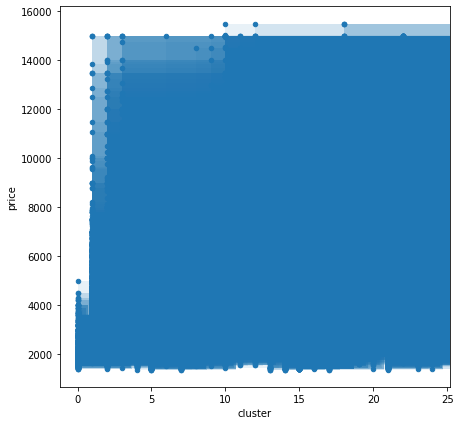

In [26]:
feature = 'cluster'
squared_errors(df_train, feature, target, m=0, b=y_train.mean())